In [1]:
from multi_lstm import *
from plotting_helper_functions import *

In [2]:
def main(epochs, time_steps, loss, neurons):


    file = '..\Data\Monthly_Stocks_Data\category a228a-fix with features.csv'
    
    temp = file.split()
    fname = temp[0] + '_' + temp[1].split('-')[0]

    data = create_df(file)

    training_df, testing_df = train_test_split(data, 0.8)

    training_dates = training_df.index.tolist()[-training_df.shape[0]:]
    
    
    target_brands = []
    for column in data.columns:
        if "brand" in column:
            target_brands.append(column)
    
    x_train, y_train, x_test, y_test = create_X_Y_train(training_df, testing_df, target_brands)
    scaler_x, scaler_y, train_x_norm, train_y_norm, test_x_norm, test_y_norm = scale_and_transform(x_train, y_train, x_test, y_test)

    x_test_3d, y_test_3d = create_dataset(test_x_norm, test_y_norm, time_steps)
    x_train_3d, y_train_3d = create_dataset(train_x_norm, train_y_norm, time_steps)

    model_bilstm = create_model_bilstm(neurons, loss, x_train_3d, len(target_brands))
    model_lstm = create_model(LSTM, neurons, loss, x_train_3d, len(target_brands))
    
    history_bilstm = fit_model(model_bilstm, epochs , x_train_3d, y_train_3d)
    history_lstm = fit_model(model_lstm, epochs, x_train_3d, y_train_3d)

    path = '../Results/Stock Predictions/' + fname
    if not os.path.exists(path):
        os.makedirs(path)
    

    plot_loss_stocks (history_bilstm, 'BILSTM', path, epochs, neurons, time_steps)       # hassam comment this line to run forecast onli
    plot_loss_stocks (history_lstm, 'LSTM', path, epochs, neurons, time_steps)           # hassam comment this line to run forecast onli

    y_train, y_test = inverse_transformation(scaler_y, y_train_3d, y_test_3d)
    
    bilstm_fit = model_fitting(model_bilstm, x_train_3d, scaler_y)
    lstm_fit = model_fitting(model_lstm, x_train_3d, scaler_y)

    plot_fit_Stocks(training_dates, target_brands, bilstm_fit, y_train, 'BiLSTM', path, epochs, neurons, time_steps)    # hassam comment this line to run forecast onli
    plot_fit_Stocks(training_dates, target_brands, lstm_fit, y_train, 'LSTM', path, epochs, neurons, time_steps)        # hassam comment this line to run forecast onli
    
    prediction_bilstm = prediction(model_bilstm, x_test_3d, scaler_y)
    prediction_lstm = prediction(model_lstm, x_test_3d, scaler_y)


    df = pd.DataFrame(prediction_lstm, columns=target_brands)
    forecast_dates = testing_df.index.tolist()[-df.shape[0]:]
    df['Date'] = forecast_dates
    df.set_index('Date', inplace=True)
    df = df.where(df < 0, 0)
        
    plot_future_Stocks(forecast_dates, target_brands, prediction_bilstm, y_test, 'BiLSTM', path, epochs, neurons, time_steps)  # hassam comment this line to run forecast onli
    plot_future_Stocks(forecast_dates, target_brands, prediction_lstm, y_test, 'LSTM', path, epochs, neurons, time_steps)      # hassam comment this line to run forecast onli





Epoch 1/500
2/2 [==============================] - 13s 1s/step - loss: 0.0529 - val_loss: 0.0445
Epoch 2/500
2/2 [==============================] - 0s 42ms/step - loss: 0.0517 - val_loss: 0.0439
Epoch 3/500
2/2 [==============================] - 0s 45ms/step - loss: 0.0503 - val_loss: 0.0432
Epoch 4/500
2/2 [==============================] - 0s 44ms/step - loss: 0.0488 - val_loss: 0.0425
Epoch 5/500
2/2 [==============================] - 0s 42ms/step - loss: 0.0470 - val_loss: 0.0417
Epoch 6/500
2/2 [==============================] - 0s 45ms/step - loss: 0.0449 - val_loss: 0.0408
Epoch 7/500
2/2 [==============================] - 0s 47ms/step - loss: 0.0423 - val_loss: 0.0400
Epoch 8/500
2/2 [==============================] - 0s 45ms/step - loss: 0.0393 - val_loss: 0.0396
Epoch 9/500
2/2 [==============================] - 0s 43ms/step - loss: 0.0358 - val_loss: 0.0403
Epoch 10/500
2/2 [==============================] - 0s 48ms/step - loss: 0.0326 - val_loss: 0.0423
Epoch 11/500
2/2 [==

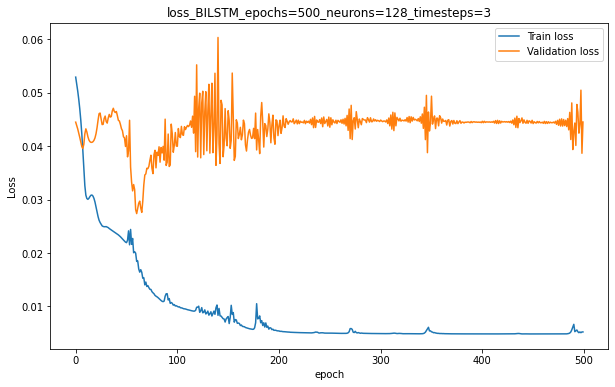

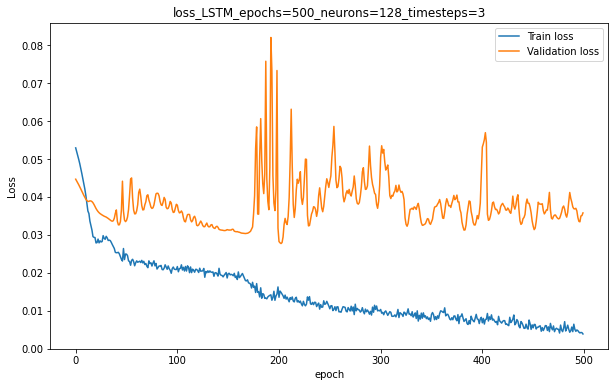

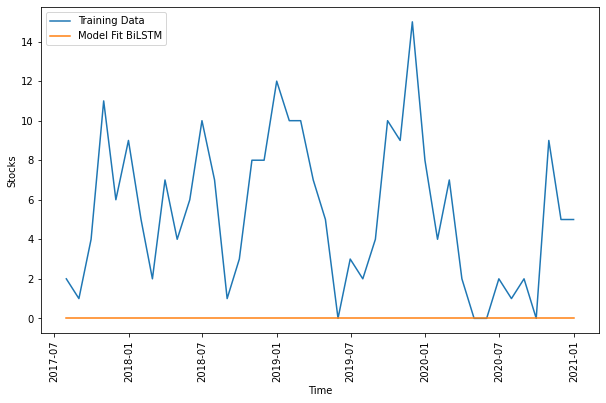

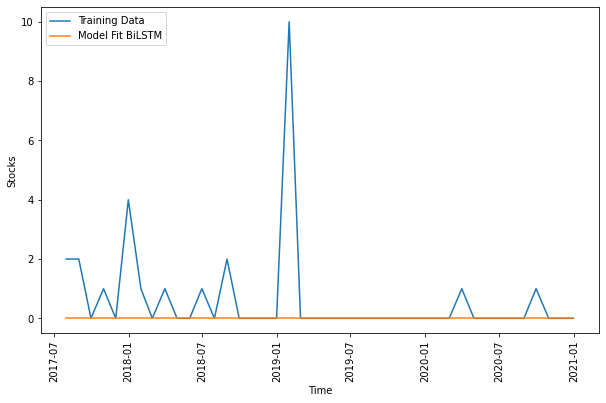

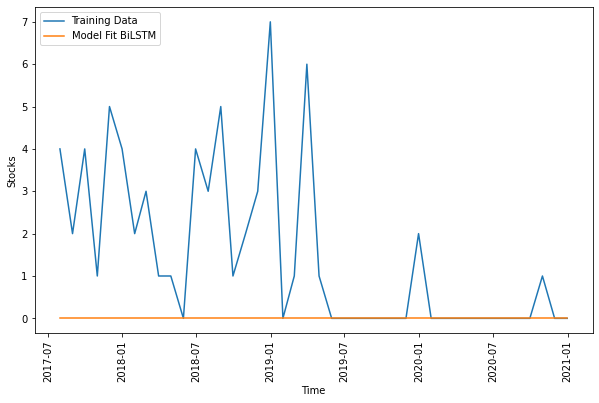

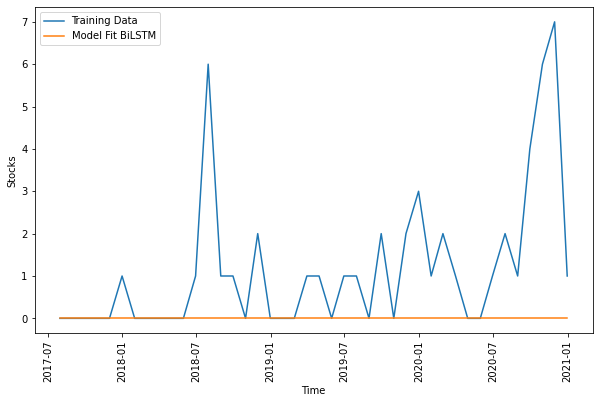

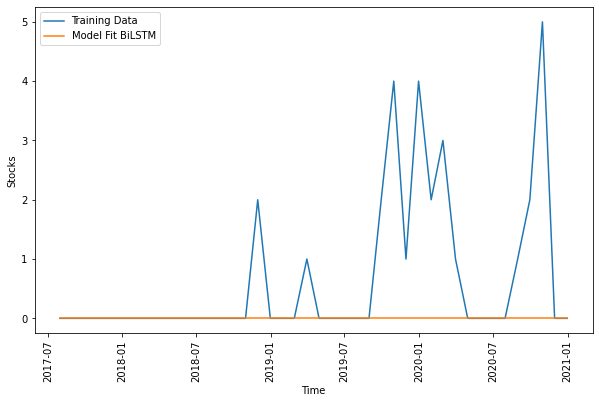

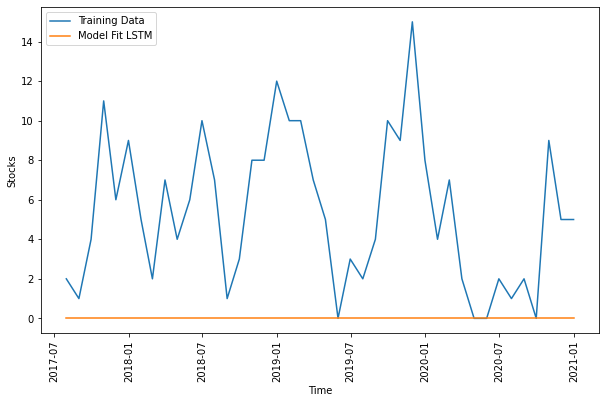

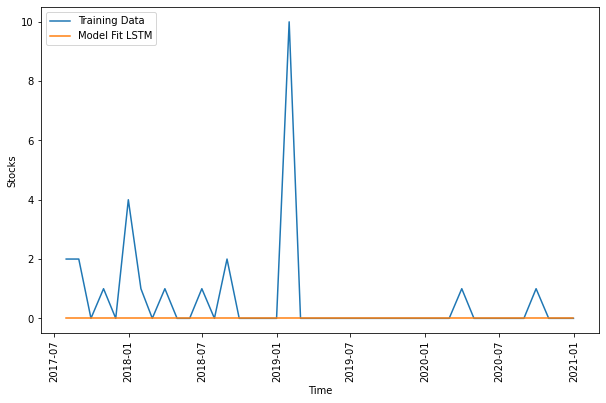

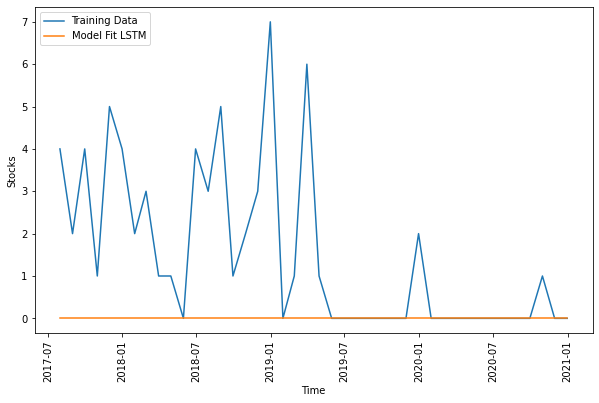

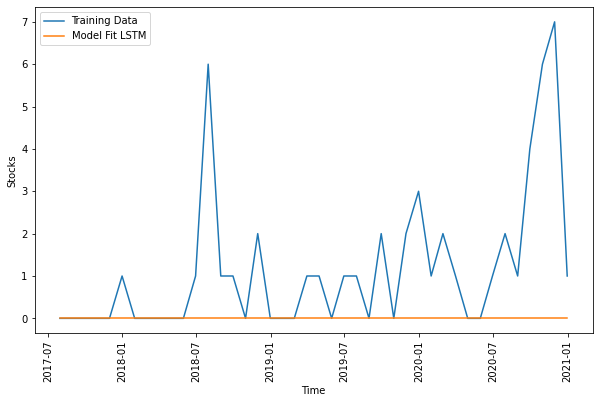

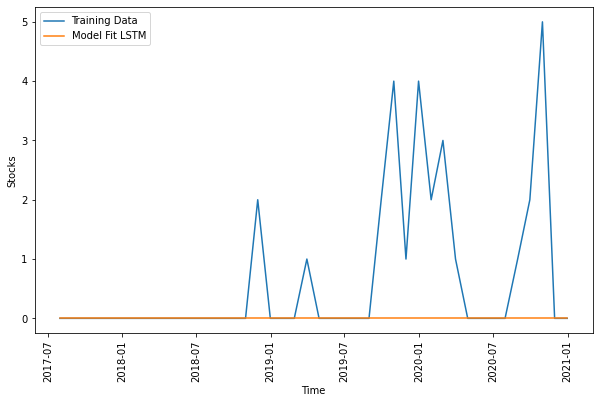

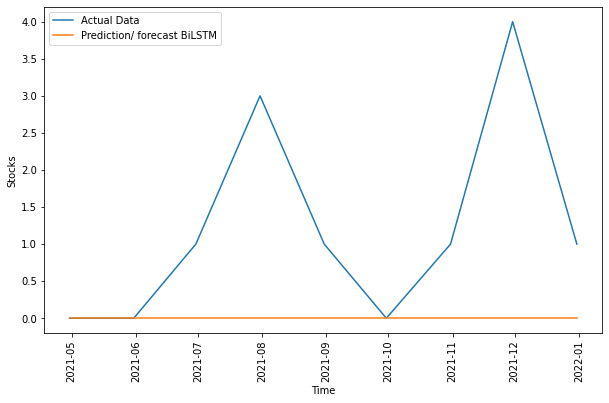

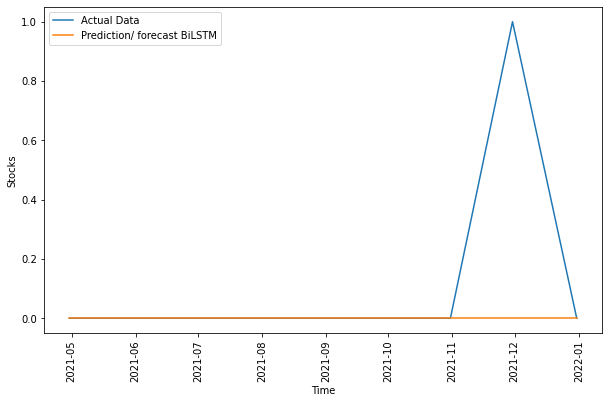

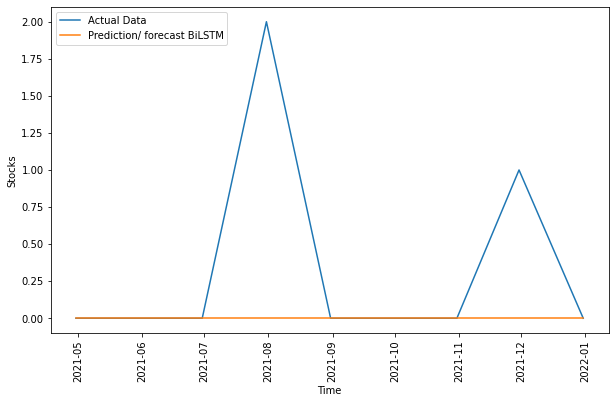

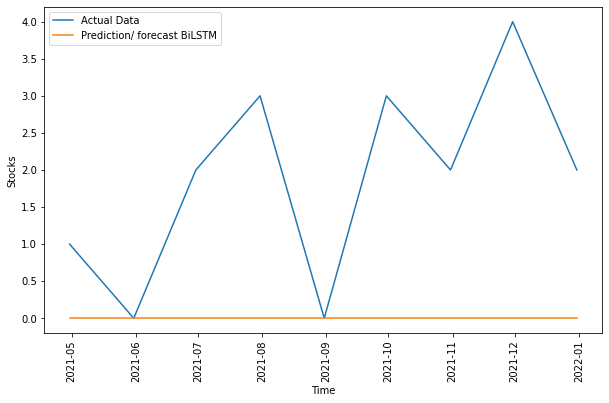

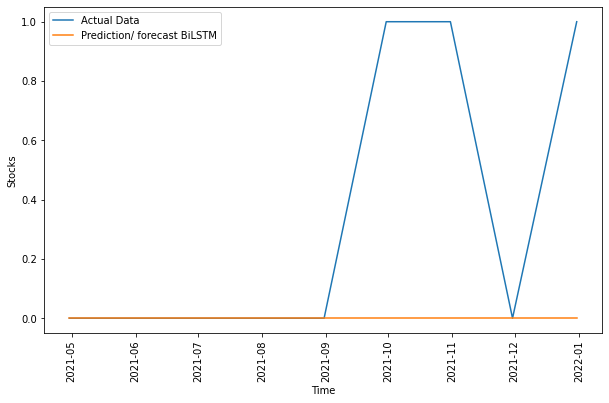

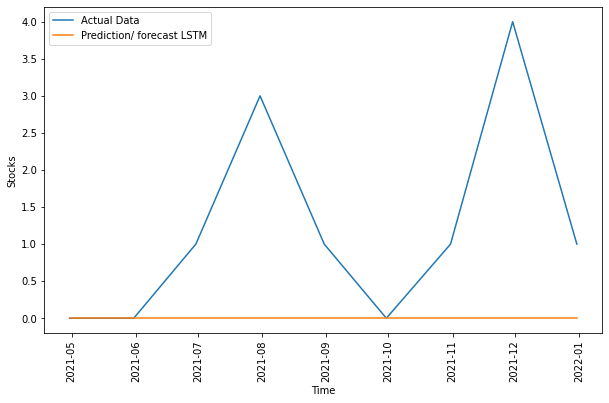

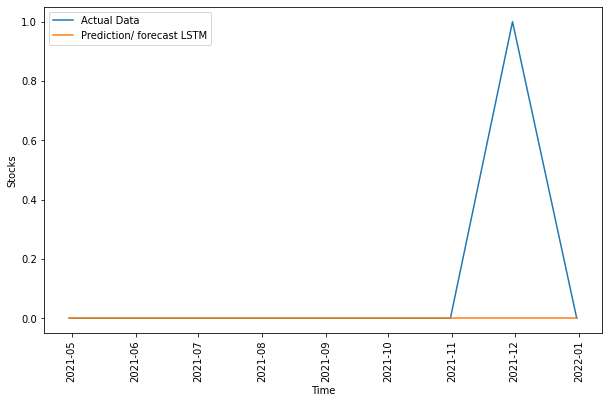

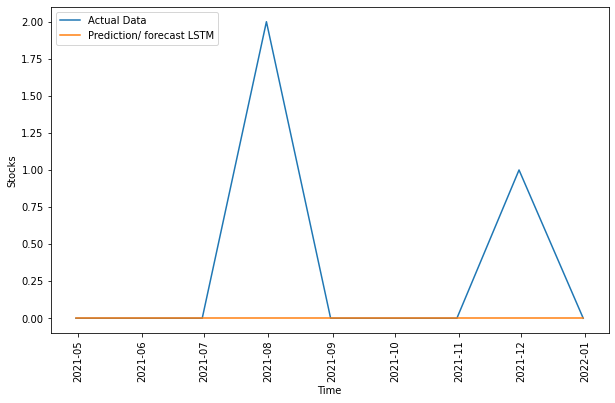

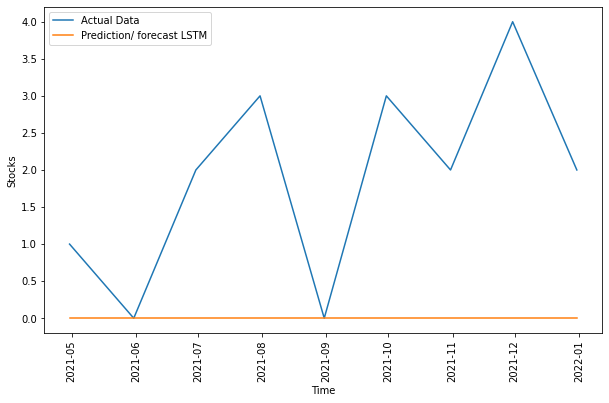

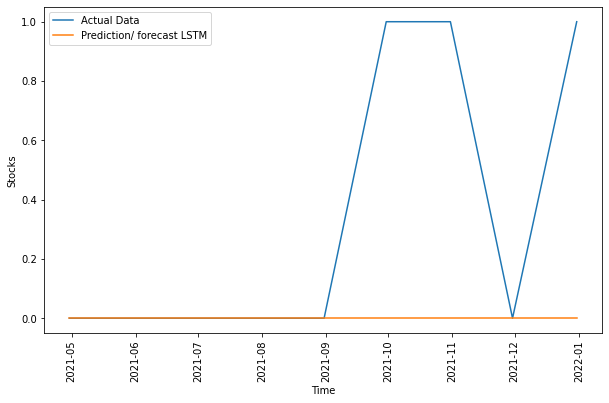

In [3]:
stock_predictions = main(epochs=500, time_steps=3, loss = 'huber_loss', neurons=128)
